In [0]:
!pip install tensorflow==2.0.0


     |████████████████████████████████| 86.3MB 67kB/s 
     |████████████████████████████████| 450kB 43.3MB/s 
     |████████████████████████████████| 3.8MB 38.3MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import tensorflow as tf 
print (tf.__version__)

2.0.0


前向传播

In [0]:
(x, y), _ = datasets.mnist.load_data()
x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
y = tf.convert_to_tensor(y, dtype=tf.int32)

print(x.shape, y.shape, x.dtype, y.dtype)
print(tf.reduce_min(x), tf.reduce_max(x))
print(tf.reduce_min(y), tf.reduce_max(y))


train_db = tf.data.Dataset.from_tensor_slices((x,y)).batch(128)
train_iter = iter(train_db)
sample = next(train_iter)
print('batch:', sample[0].shape, sample[1].shape)

(60000, 28, 28) (60000,) <dtype: 'float32'> <dtype: 'int32'>
tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(9, shape=(), dtype=int32)
batch: (128, 28, 28) (128,)


In [0]:
# [b, 784] => [b, 256] => [b, 128] => [b, 10]
# [dim_in, dim_out], [dim_out]
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))

lr = 1e-3

losses = []

for epoch in range(20): # iterate db for 10
    for step, (x, y) in enumerate(train_db): # for every batch
        x = tf.reshape(x, [-1, 28*28])
        with tf.GradientTape() as tape: # tf.Variable
            h1 = x@w1 + tf.broadcast_to(b1, [x.shape[0], 256])
            h1 = tf.nn.relu(h1)

            h2 = h1@w2 + b2
            h2 = tf.nn.relu(h2)

            out = h2@w3 + b3
            
            y_onehot = tf.one_hot(y, depth=10)
            loss = tf.square(y_onehot - out)
            loss = tf.reduce_mean(loss)

        # compute gradients
        grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
        # print(grads)
        # w1 = w1 - lr * w1_grad
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])

        if step % 100 == 0:
            print(epoch, step, 'loss:', float(loss))
    losses.append(float(loss))

0 0 loss: 0.35031789541244507
0 100 loss: 0.18575042486190796
0 200 loss: 0.15791073441505432
0 300 loss: 0.1462753713130951
0 400 loss: 0.1471952497959137
1 0 loss: 0.1355636864900589
1 100 loss: 0.1384800374507904
1 200 loss: 0.13252954185009003
1 300 loss: 0.12673214077949524
1 400 loss: 0.1296200454235077
2 0 loss: 0.12038655579090118
2 100 loss: 0.12442793697118759
2 200 loss: 0.11957991123199463
2 300 loss: 0.11476922035217285
2 400 loss: 0.11759829521179199
3 0 loss: 0.11003267765045166
3 100 loss: 0.11462737619876862
3 200 loss: 0.11058138310909271
3 300 loss: 0.10618851333856583
3 400 loss: 0.10888433456420898
4 0 loss: 0.10235706716775894
4 100 loss: 0.1072729080915451
4 200 loss: 0.10384573042392731
4 300 loss: 0.09968148171901703
4 400 loss: 0.10217776149511337
5 0 loss: 0.09643435478210449
5 100 loss: 0.1016118973493576
5 200 loss: 0.0984739437699318
5 300 loss: 0.09455020725727081
5 400 loss: 0.09691343456506729
6 0 loss: 0.09165366739034653
6 100 loss: 0.0969568639993667

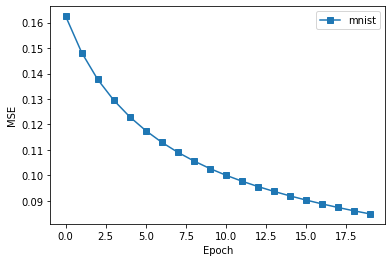

In [0]:
import matplotlib.pyplot as plt 


plt.figure()
plt.plot(losses, color='C0', marker='s' )
plt.xlabel('Epoch')
plt.legend()
plt.ylabel('MSE')
plt.savefig('forward.svg')
# plt.show()